## Observations and Insights 

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata
#study_results
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
combined_data.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].count()
print(f"The total number of mice is {num_mice}")

unique_mice = combined_data["Mouse ID"].nunique()
print(f"The number of unique mice is {unique_mice}")

The total number of mice is 1893
The number of unique mice is 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_miceid = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_miceid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"],keep=False)
clean_data.reset_index(drop=True)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1878,z969,Naftisol,Male,9,30,25,63.145652,2
1879,z969,Naftisol,Male,9,30,30,65.841013,3
1880,z969,Naftisol,Male,9,30,35,69.176246,4
1881,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
cleanmice_num = clean_data["Mouse ID"].count()
print(f"The updated total number of mice is {cleanmice_num}")
uniquemice_num = clean_data["Mouse ID"].nunique()
print(f"The number of unique mice is {uniquemice_num}")

The updated total number of mice is 1883
The number of unique mice is 249


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#sem_val = st.sem(clean_data["Tumor Volume (mm3)"], axis=None, ddof=0)
#print(f"The SEM value for the tumor volume is {sem_val}")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_variance = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_stdev = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


#Assemble the resulting series into a single summary dataframe.
summary_data = pd.DataFrame({
    "Mean" : regimen_mean,
    "Median" : regimen_median,
    "Variance" : regimen_variance,
    "Standard Deviation" : regimen_stdev,
    "SEM" : regimen_sem
})
summary_data


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats =clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})

summary_stats



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#first determine the number of times each drug was administered
num_admin = clean_data["Drug Regimen"].value_counts()
num_admin

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     151
Name: Drug Regimen, dtype: int64

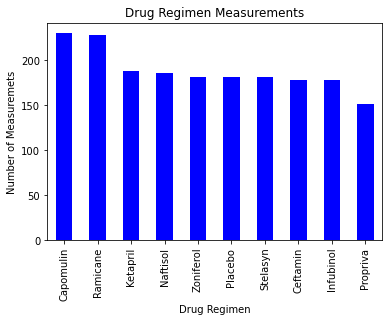

In [11]:
#num_admin = pd.DataFrame(
   # {"Number of Measurements": {num_admin}, 
   # index=["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Propriva"]
# Plot a bar chart
#num_admin.plot(kind="bar")
     
#barplot
num_admin.plot(kind='bar', color='blue')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measuremets")
plt.title("Drug Regimen Measurements")

plt.show()

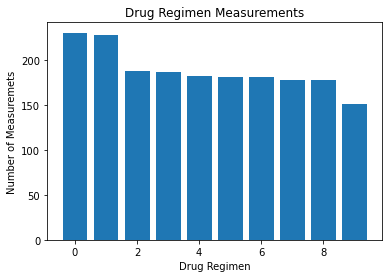

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#determine what your axis will be
x_axis = clean_data["Drug Regimen"].value_counts()
y_axis = clean_data["Drug Regimen"].value_counts()

plt.bar(np.arange(len(x_axis)), y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measuremets")
plt.title("Drug Regimen Measurements")
plt.show()

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#get the count of each sex
gender = clean_data["Sex"].value_counts()
gender


Male      958
Female    925
Name: Sex, dtype: int64

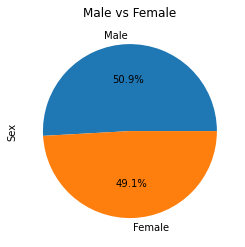

In [14]:
#Pie plot
gender.plot(kind="pie", autopct="%1.1f%%")
plt.title("Male vs Female")
plt.show()

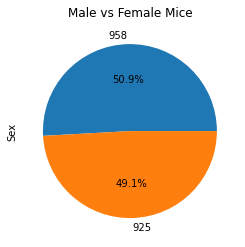

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender.values, labels=gender.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Male vs Female Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
desired_drug_list = clean_data[clean_data["Drug Regimen"].isin(["Capomulin","Ramicane", "Infubinol", "Ceftamin"])]
desired_drug_list = desired_drug_list.sort_values(["Mouse ID", "Timepoint"], ascending=False)
# Start by getting the last (greatest) timepoint for each mouse
greatest_tumor = desired_drug_list.drop_duplicates(subset=["Mouse ID"], keep="first")
greatest_tumor
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_tumor = greatest_tumor[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#rename the last column
greatest_tumor =greatest_tumor.rename(columns = {"Tumor Volume (mm3)":"Final Tumor Volume"})
greatest_tumor_new = greatest_tumor.sort_values(["Drug Regimen", "Mouse ID"], ascending=True)
greatest_tumor_new

,Drug Regimen,Mouse ID,Timepoint,Final Tumor Volume
309,Capomulin,b128,45,38.982878
299,Capomulin,b742,45,38.939633
64,Capomulin,f966,20,30.485985
244,Capomulin,g288,45,37.074024
360,Capomulin,g316,45,40.159220
...,...,...,...,...
59,Ramicane,s508,45,30.276232
410,Ramicane,u196,45,40.667713
449,Ramicane,w678,5,43.166373
453,Ramicane,y449,15,44.183451


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin","Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
   
for drug in drugs:
 
    tumor_volume = greatest_tumor_new.loc[greatest_tumor_new["Drug Regimen"]==drug,"Final Tumor Volume"]
    tumor_volume_data.append(tumor_volume)
    lowerq = np.quantile(tumor_volume_data, .25)
    middle = np.quantile(tumor_volume_data, .5)
    upperq = np.quantile(tumor_volume_data, .75)
    iqr = upperq-lowerq
     

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of temperatures is: {middle} ")
print(f"------------------------------")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
The the median of temperatures is: 45.0 
------------------------------
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


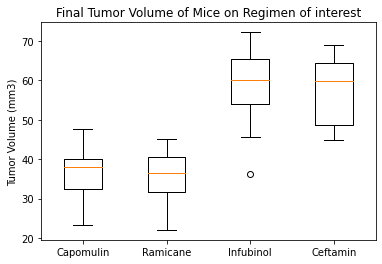

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
combined,ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Mice on Regimen of interest')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_volume_data)
ax1.set_xticklabels(drugs)
plt.show()

## Line and Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
